# Importing Lib's

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sna
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
os.getcwd()

'C:\\Users\\GOJO\\Documents\\Personal_Loan_Prediction_Approval (Machine Learning )\\Training'

# Data set

In [3]:
Data = pd.read_csv(r"C:\\Users\\GOJO\\Documents\\Personal_Loan_Prediction_Approval (Machine Learning )\\DataSet\\testData1.csv")

In [4]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,no
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,yes


In [5]:
Data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


# Handling Missing Data  

In [7]:
Data['Gender'] = Data['Gender'].fillna(Data['Gender'].mode()[0])
Data['Dependents'] = Data['Dependents'].str.replace('+','')
Data['Dependents'] = Data['Dependents'].fillna(Data['Dependents'].mode()[0])
Data['Self_Employed'] = Data['Self_Employed'].fillna(Data['Self_Employed'].mode()[0])
Data['LoanAmount'] = Data['LoanAmount'].fillna(Data['LoanAmount'].mode()[0])
Data['Loan_Amount_Term'] = Data['Loan_Amount_Term'].fillna(Data['Loan_Amount_Term'].mode()[0])
Data['Credit_History'] = Data['Credit_History'].fillna(Data['Credit_History'].mode()[0])

In [8]:
Data['Married'] = Data['Married'].fillna(Data['Married'].mode()[0])

In [9]:
Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
Data['LoanAmount']=Data['LoanAmount'].astype('int64')

Data['Loan_Amount_Term']=Data['Loan_Amount_Term'].astype('int64')

Data['Credit_History']=Data['Credit_History'].astype('int64')


In [11]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

In [12]:
x = Data.iloc[:,1:11].values
y = Data.iloc[:,-1].values
x


array([['Male', 'Yes', '0', ..., 110, 360, 1],
       ['Male', 'Yes', '1', ..., 126, 360, 1],
       ['Male', 'Yes', '2', ..., 208, 360, 1],
       ...,
       ['Male', 'No', '0', ..., 126, 360, 1],
       ['Male', 'Yes', '0', ..., 158, 360, 1],
       ['Male', 'No', '0', ..., 98, 180, 1]], dtype=object)

In [13]:
Gen = Data.iloc[:,1].values
Ed = Data.loc[:,['Education']]

AI = Data.loc[:,['ApplicantIncome']]
CH = Data.loc[:,['Credit_History']]

Ma = Data.loc[:,['Married']]
SE = Data.loc[:,['Self_Employed']]
LA = Data.loc[:,['LoanAmount']]
PA = Data.loc[:,['Property_Area']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Gen = le.fit_transform(Gen)
Gen
Ma = le.fit_transform(Ma)
SE = le.fit_transform(SE)
PA = le.fit_transform(PA)
Ed = le.fit_transform(Ed)



C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:11

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 'Male', ..., 110, 360, 1],
       [0.0, 1.0, 'Male', ..., 126, 360, 1],
       [0.0, 1.0, 'Male', ..., 208, 360, 1],
       ...,
       [1.0, 0.0, 'Male', ..., 126, 360, 1],
       [0.0, 1.0, 'Male', ..., 158, 360, 1],
       [1.0, 0.0, 'Male', ..., 98, 180, 1]], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])
x[:,4] = le.fit_transform(x[:,4])
x[:,5] = le.fit_transform(x[:,5])
x[:,6] = le.fit_transform(x[:,6])
x[:,7] = le.fit_transform(x[:,7])
x[:,8] = le.fit_transform(x[:,8])
x[:,9] = le.fit_transform(x[:,9])
x[:,10] = le.fit_transform(x[:,10])
x


array([[0, 1, 1, ..., 52, 10, 1],
       [0, 1, 1, ..., 67, 10, 1],
       [0, 1, 1, ..., 119, 10, 1],
       ...,
       [1, 0, 1, ..., 67, 10, 1],
       [0, 1, 1, ..., 94, 10, 1],
       [1, 0, 1, ..., 40, 6, 1]], dtype=object)

In [16]:
x=x.astype('int64')
x.shape[0]


367

In [17]:
y = le.fit_transform(y)
y.shape[0]

367

# Univariate analysis

C:\Users\GOJO\AppData\Local\Temp\ipykernel_1636\3880126379.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot(AI, color='r')
C:\Users\GOJO\AppData\Local\Temp\ipykernel_1636\3880126379.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot(CH)


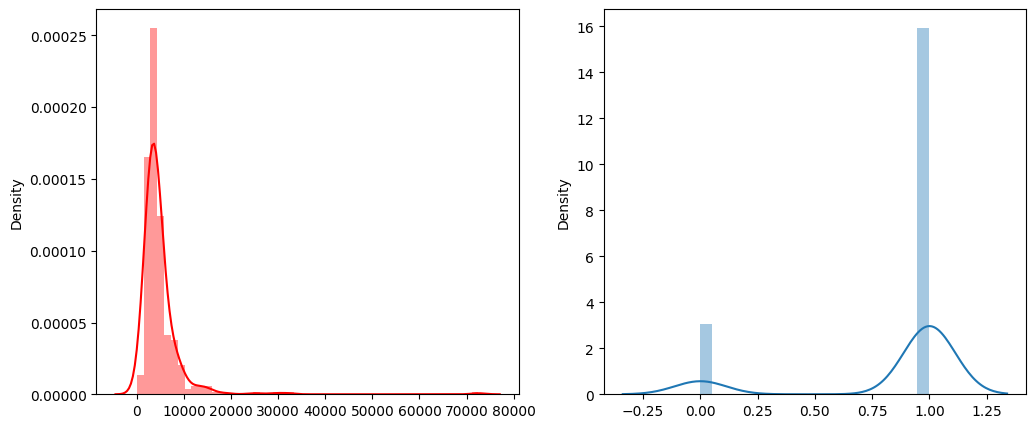

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sna.distplot(AI, color='r')
plt.subplot(122)
sna.distplot(CH)
plt.show()

# Bivariate analysis

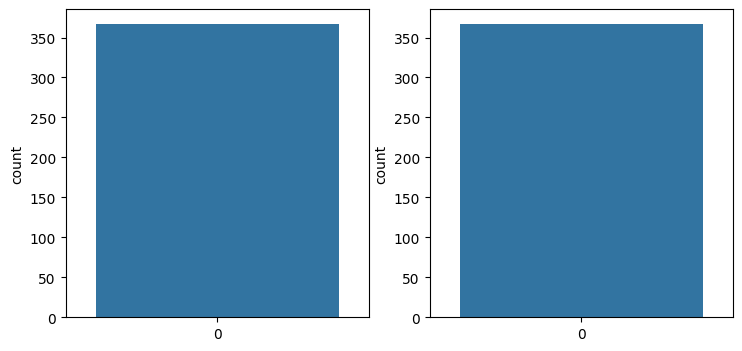

In [19]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sna.countplot(Gen)
plt.subplot(1,4,2)
sna.countplot(Ed)
plt.show()


<Axes: xlabel='Property_Area', ylabel='count'>

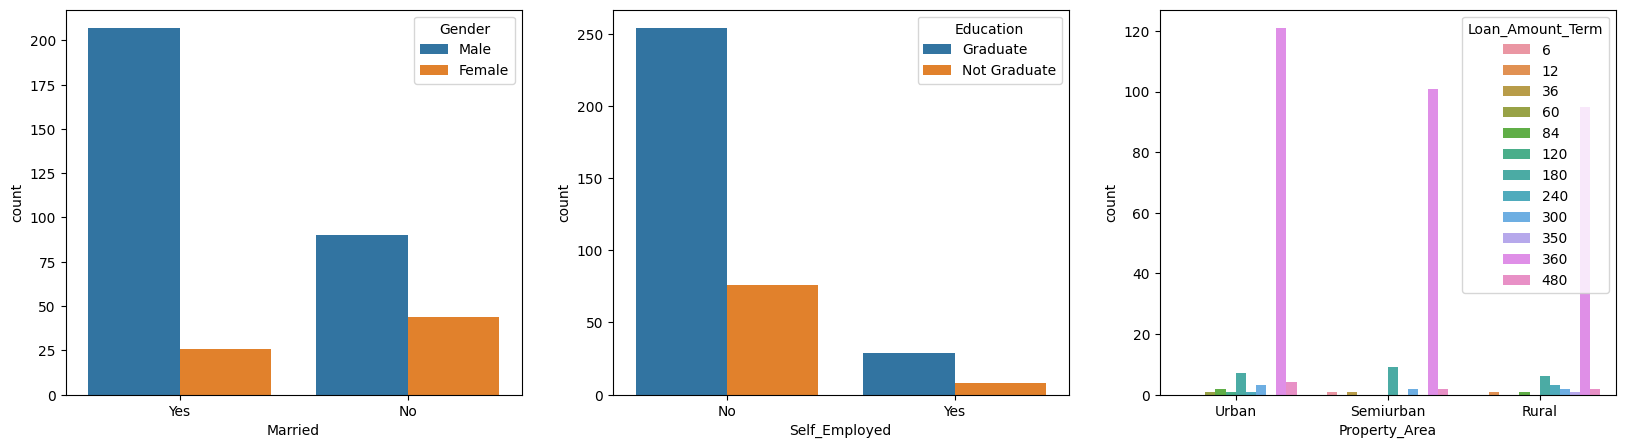

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sna.countplot(x=Data['Married'], hue=Data['Gender'])
plt.subplot(132)
sna.countplot(x=Data['Self_Employed'], hue=Data['Education'])
plt.subplot(133)
sna.countplot(x=Data['Property_Area'], hue=Data['Loan_Amount_Term'])


# Multivariate analysis

C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

C:\Users\GOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


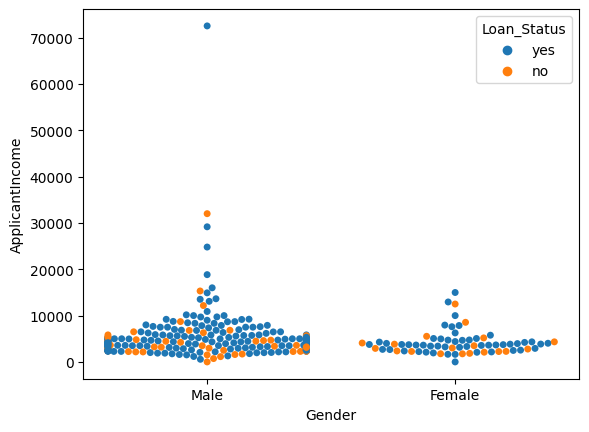

In [51]:
sna.swarmplot(x=Data['Gender'], y=Data['ApplicantIncome'], hue= Data['Loan_Status'])

# Train Test Split

In [22]:
sc = StandardScaler()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)


In [24]:
def decisionTree(X_train, X_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    yPred= dt.predict(X_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    

In [25]:
def randomForest(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    yPred = rf.predict(X_test)
    print('******RandomForestClassifier*****')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    

In [26]:
def KNN(X_train,X_test,y_train,y_test):
    Knn = KNeighborsClassifier()
    Knn.fit(X_train,y_train)
    yPred = Knn.predict(X_test)
    print('******KNeighborsClassifier*****')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    

In [27]:
def xgboost(X_train,X_test,y_train,y_test):
    xg = GradiantBoostingClassifier()
    xg.fit(X_train,y_train)
    yPred = xg.predict(X_test)
    print('******GradiantBoostingClassifier*****')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))
    

# Training The  Model

In [28]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [29]:
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))


In [30]:
classifier.add(Dense(units=50, activation='relu'))

In [31]:
classifier.add(Dense(units=1, activation='sigmoid'))


In [32]:
classifier.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])


In [33]:
classifier.fit(X_train,
              y_train,
              batch_size= 32,
              epochs=100)

Epoch 1/100
8/8 [==============================] - 6s 23ms/step - loss: 1.0106 - accuracy: 0.6898
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7580 - accuracy: 0.8122
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6391 - accuracy: 0.7265
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5335 - accuracy: 0.7918
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5273 - accuracy: 0.8163
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5022 - accuracy: 0.8367
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6019 - accuracy: 0.7918
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.8082
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5062 - accuracy: 0.8082
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4588 - accuracy: 0.8449
Epoch 11/100
8/8 [===

8/8 [==============================] - 0s 7ms/step - loss: 0.3268 - accuracy: 0.8980
Epoch 85/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4605 - accuracy: 0.8571
Epoch 86/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3322 - accuracy: 0.8816
Epoch 87/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3475 - accuracy: 0.8694
Epoch 88/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2736 - accuracy: 0.8939
Epoch 89/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2727 - accuracy: 0.9020
Epoch 90/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3060 - accuracy: 0.8980
Epoch 91/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.9020
Epoch 92/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2669 - accuracy: 0.8939
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2636 - accuracy: 0.8980
Epoch 94/100
8/8 [=============

# Testing the model

In [34]:
X_train

array([[  0,   1,   1, ..., 115,  10,   1],
       [  0,   1,   1, ..., 110,   6,   1],
       [  0,   1,   1, ...,  78,  10,   1],
       ...,
       [  0,   1,   0, ...,  41,  10,   1],
       [  0,   1,   1, ...,  74,  10,   1],
       [  0,   1,   1, ...,  57,  10,   1]], dtype=int64)

In [35]:
print(classifier.predict([[1,1, 0,1,1,4276, 1542, 154, 240,0, 1]]))

1/1 [==============================] - 0s 391ms/step
[[1.]]


In [36]:
classifier.save("loan.h5")

In [37]:
y_pred = classifier.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [38]:
y_pred

array([[3.3942419e-01],
       [7.3912275e-01],
       [9.6747065e-01],
       [2.9435880e-02],
       [6.8544126e-01],
       [6.2439173e-01],
       [6.1531854e-01],
       [1.9823858e-06],
       [9.5663631e-01],
       [9.5391464e-01],
       [9.4664967e-01],
       [9.0755612e-01],
       [9.0713227e-01],
       [1.0823336e-01],
       [3.7486070e-01],
       [9.7501171e-01],
       [9.9018884e-01],
       [8.8383496e-01],
       [9.4854820e-01],
       [3.3573203e-03],
       [6.3740712e-01],
       [4.6959275e-04],
       [9.7117877e-01],
       [8.2532740e-01],
       [9.9089402e-01],
       [9.9311256e-01],
       [7.8400469e-01],
       [9.6929204e-01],
       [2.6833433e-01],
       [8.5465741e-01],
       [1.8793284e-06],
       [9.4515127e-01],
       [8.6183512e-01],
       [8.1530422e-01],
       [9.1105306e-01],
       [5.0425285e-01],
       [4.7633919e-01],
       [9.7051191e-01],
       [9.6128798e-01],
       [9.7695148e-01],
       [8.2375813e-01],
       [1.532562

In [39]:
y_pred =(y_pred>0.5)
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [40]:
def predict_exit(Sample_value):
    Sample_value = np.array(Sample_value)
    Sample_value = Sample_value.reshape(1, -1)
    #Sample_value = le.fit_transform(Sample_value)
    return classifier.predict(Sample_value)

In [41]:
Sample_value = [[1,0,1,1,1,46,15,145,240,0,1]]
if predict_exit(Sample_value)>0.5:
    print('Predicting High Chance Loan Approval')
else:
    print('Predicting Low Chance Loan Approval')

1/1 [==============================] - 0s 98ms/step
Predicting High Chance Loan Approval


In [42]:
Sample_value = [[0,1,0,0,0,0,0,15,0,0,0]]
if predict_exit(Sample_value)>0.5:
    print('Predicting High Chance Loan Approval')
else:
    print('Predicting Low Chance Loan Approval')

1/1 [==============================] - 0s 79ms/step
Predicting Low Chance Loan Approval


In [43]:
def compareModel(X_train,X_test,y_train,y_test):
    decisionTree(X_train,X_test,y_train,y_test)
    print('-'*100)
    
    randomForest(X_train,X_test,y_train,y_test)
    print('-'*100)
    
   # xgboost(X_train, X_test, y_train, y_test)
    #print('-'*100)
    
    KNN(X_train,X_test,y_train,y_test)
    print('-'*100)

# Compare The Model

In [44]:
compareModel(X_train,X_test,y_train,y_test)

***DecisionTreeClassifier***
Confusion matrix
[[30 10]
 [ 8 74]]
Classification report
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.88      0.90      0.89        82

    accuracy                           0.85       122
   macro avg       0.84      0.83      0.83       122
weighted avg       0.85      0.85      0.85       122

----------------------------------------------------------------------------------------------------
******RandomForestClassifier*****
Confusion matrix
[[30 10]
 [ 1 81]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85        40
           1       0.89      0.99      0.94        82

    accuracy                           0.91       122
   macro avg       0.93      0.87      0.89       122
weighted avg       0.92      0.91      0.91       122

------------------------------------------------------------------

In [45]:
ypred = classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("Confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification report")
print(classification_report(y_test,y_pred))

4/4 [==============================] - 0s 6ms/step
0.6967213114754098
ANN Model
Confusion_matrix
[[12 28]
 [ 9 73]]
Classification report
              precision    recall  f1-score   support

           0       0.57      0.30      0.39        40
           1       0.72      0.89      0.80        82

    accuracy                           0.70       122
   macro avg       0.65      0.60      0.60       122
weighted avg       0.67      0.70      0.67       122



In [46]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)


In [47]:
f1_score(ypred,y_test,average='weighted')

0.9132053764832909

In [48]:
cv = cross_val_score(rf,x,y,cv=5)

In [49]:
np.mean(cv)

0.9182154757497223

In [50]:
#convert the model as pickle file
pickle.dump(classifier,open('rdf.pkl','wb'))